In [383]:
# imports para limpeza e análise

import pandas as pd
import numpy as np
import sqlite3
from scipy.stats import zscore
import seaborn as sns                   
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 10, 5

In [384]:
# conexão com o banco de dados
conn = sqlite3.connect('houseprices.db')

In [397]:
# consulta ao banco de dados
df = pd.read_sql("""

SELECT DISTINCT *, 'ACLIMAÇÃO'          as "bairro", "SÃO PAULO"            as "cidade" FROM HP_aclimacao_20220817 UNION ALL
SELECT DISTINCT *, 'PARAÍSO'            as "bairro", "SÃO PAULO"            as "cidade" FROM HP_paraiso_20220817 UNION ALL
SELECT DISTINCT *, 'SÃO CAETANO DO SUL' as "bairro", "SÃO CAETANO DO SUL"   as "cidade" FROM HP_saocaetano_20220817 UNION ALL
SELECT DISTINCT *, 'VILA DOM PEDRO I'   as "bairro", "SÃO PAULO"            as "cidade" FROM HP_vldompredroi_20220817 UNION ALL
SELECT DISTINCT *, 'SAÚDE'              as "bairro", "SÃO PAULO"            as "cidade" FROM HP_saude_20220817 UNION ALL
SELECT DISTINCT *, 'VILA MARIANA'       as "bairro", "SÃO PAULO"            as "cidade" FROM HP_vlmariana_20220817 UNION ALL
SELECT DISTINCT *, 'VILA PRUDENTE'      as "bairro", "SÃO PAULO"            as "cidade" FROM HP_vlprudente_20220816 UNION ALL
SELECT DISTINCT *, 'IPIRANGA'           as "bairro", "SÃO PAULO"            as "cidade" FROM HP_Ipiranga_20220816

""", conn)

# verifica o tamanho do dataset
df.shape

(11896, 13)

In [398]:
# verifica os tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11896 entries, 0 to 11895
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   data_consulta  11896 non-null  object
 1   titulo         11896 non-null  object
 2   endereco       11896 non-null  object
 3   tipo_imovel    11896 non-null  object
 4   area           11896 non-null  object
 5   quarto         11896 non-null  object
 6   banheiro       11896 non-null  object
 7   vagas_garagem  11896 non-null  object
 8   valor          11896 non-null  object
 9   anunciante     11896 non-null  object
 10  link           11896 non-null  object
 11  bairro         11896 non-null  object
 12  cidade         11896 non-null  object
dtypes: object(13)
memory usage: 1.2+ MB


In [399]:
# visualiza os primeiros e os últimos registros do dataset

df

,data_consulta,titulo,endereco,tipo_imovel,area,quarto,banheiro,vagas_garagem,valor,anunciante,link,bairro,cidade
0,2022-08-17,"Casa com 2 Quartos à Venda, 110m²","Rua Heitor Peixoto, 17 - Aclimação, São Paulo ...",Casa,110,2,2,--,R$ 678.000,Dream Home Broker,/imovel/casa-2-quartos-aclimacao-centro-sao-pa...,ACLIMAÇÃO,SÃO PAULO
1,2022-08-17,"Casa com 3 Quartos à Venda, 200m²","Rua Nilo, 171 - Aclimação, São Paulo - SP",Casa,200,3,2,--,R$ 851.000,Pb Imóveis,/imovel/casa-3-quartos-aclimacao-centro-sao-pa...,ACLIMAÇÃO,SÃO PAULO
2,2022-08-17,"Casa com 3 Quartos à Venda, 110m²","Rua Pais de Andrade - Aclimação, São Paulo - SP",Casa,110,3,1,--,R$ 680.000,Century 21 Ello,/imovel/casa-3-quartos-aclimacao-centro-sao-pa...,ACLIMAÇÃO,SÃO PAULO
3,2022-08-17,"Casa com 5 Quartos à Venda, 225m²","Rua Ximbó - Aclimação, São Paulo - SP",Casa,225,5,5,3,R$ 2.180.000,Bastos Imoveis Ltda Me,/imovel/casa-5-quartos-aclimacao-centro-sao-pa...,ACLIMAÇÃO,SÃO PAULO
4,2022-08-17,"Casa com 2 Quartos à Venda, 199m²","Rua Mazzini - Aclimação, São Paulo - SP",Casa,199,2,1,--,R$ 636.000,Grupo 360M2,/imovel/casa-2-quartos-aclimacao-centro-sao-pa...,ACLIMAÇÃO,SÃO PAULO
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11891,2022-08-16,"Casa com 6 Quartos à Venda, 354m²","Rua Gonçalo Pedrosa - Ipiranga, São Paulo - SP",Casa,354,6,6,3,R$ 1.950.000,Quinto Andar Vendas,/imovel/casa-6-quartos-ipiranga-zona-sul-sao-p...,IPIRANGA,SÃO PAULO
11892,2022-08-16,"Casa com 2 Quartos à Venda, 120m²","Rua Mil Oitocentos e Vinte e Dois - Ipiranga, ...",Casa,120,2,1,1,R$ 420.000\n \nPreço abai...,Arbo,/imovel/casa-2-quartos-ipiranga-zona-sul-sao-p...,IPIRANGA,SÃO PAULO
11893,2022-08-16,"Casa com 3 Quartos à Venda, 226m²","Rua Leais Paulistanos - Ipiranga, São Paulo - SP",Casa,226,3,3,1,R$ 700.000\n \nPreço abai...,Quinto Andar Vendas,/imovel/casa-3-quartos-ipiranga-zona-sul-sao-p...,IPIRANGA,SÃO PAULO
11894,2022-08-16,"Casa com 4 Quartos à Venda, 297m²","Rua Vergueiro - Ipiranga, São Paulo - SP",Casa,297,4,3,1,R$ 790.000\n \nPreço abai...,Quinto Andar Vendas,/imovel/casa-4-quartos-ipiranga-zona-sul-sao-p...,IPIRANGA,SÃO PAULO


In [400]:
# vamos checar os endereços
# quero saber se todos são de São Paulo

print('SP:',len([s for s in df['endereco'] if "SP" in s]))

SP: 11894


O total de registros no dataset é 11.896 rowns, e endereços em SP correspondem a 11.894, sendo assim, dois registros possívelmente não são de SP.

In [401]:
# Quais não são de São Paulo?

df.query("endereco.str.contains('SP') == False")

,data_consulta,titulo,endereco,tipo_imovel,area,quarto,banheiro,vagas_garagem,valor,anunciante,link,bairro,cidade
6860,2022-08-17,"Casa com 3 Quartos à Venda, 164m²","Travessa Lindolfo Barbosa - Vila Mariana, Salv...",Casa,164,3,3,2,R$ 800.000,Imobiliaria Newton Alvarez Ltda - Epp,/imovel/casa-3-quartos-vila-mariana-zona-sul-s...,VILA MARIANA,SÃO PAULO
9477,2022-08-16,"Casa com 3 Quartos à Venda, 350m²","Rua Pedestre - Vila Prudente, Contagem - MG",Casa,350,3,2,5,R$ 750.000,Efaichel,/imovel/casa-3-quartos-vila-prudente-zona-lest...,VILA PRUDENTE,SÃO PAULO


Apenas o registro 9.477 não pertence a SP, ele está classificado incorretamente no site e na verdade pertence a um imóvel de Minas Gerais.

In [402]:
# Apagando o registro de MG

df.drop([9477], inplace=True)

In [403]:
# vamos checar os endereços
# quero saber se todos os registros rotulados com um determinado bairro de fato pertencem aquele bairro

bairros = pd.DataFrame(df.bairro.value_counts()).reset_index()
bairros.columns = [['bairro','qt_casas']]
display(bairros)


print('SÃO CAETANO DO SUL:',len([s for s in df.query('bairro == "SÃO CAETANO DO SUL"')['endereco'].str.upper() if "SÃO CAETANO DO SUL" or "sao caetano" in s]))
print('VILA MARIANA:',len([s for s in df.query('bairro == "VILA MARIANA"')['endereco'].str.upper() if "VILA MARIANA" in s]))
print('SAÚDE:',len([s for s in df.query('bairro == "SAÚDE"')['endereco'].str.upper() if "SAÚDE" or "SAUDE"in s]))
print('IPIRANGA:',len([s for s in df.query('bairro == "IPIRANGA"')['endereco'].str.upper() if "IPIRANGA" in s]))
print('VILA PRUDENTE:',len([s for s in df.query('bairro == "VILA PRUDENTE"')['endereco'].str.upper() if "VILA PRUDENTE" in s]))
print('ACLIMAÇÃO:',len([s for s in df.query('bairro == "ACLIMAÇÃO"')['endereco'].str.upper() if "ACLIMAÇÃO" in s]))
print('PARAÍSO:',len([s for s in df.query('bairro == "PARAÍSO"')['endereco'].str.upper() if "PARAÍSO" in s]))
print('VILA DOM PEDRO I:',len([s for s in df.query('bairro == "VILA DOM PEDRO I"')['endereco'].str.upper() if "VILA DOM PEDRO I" or "VL DOM PEDRO I"in s]))

,bairro,qt_casas
0,SÃO CAETANO DO SUL,4203
1,VILA MARIANA,2068
2,SAÚDE,1867
3,IPIRANGA,1857
4,VILA PRUDENTE,1142
5,ACLIMAÇÃO,686
6,PARAÍSO,36
7,VILA DOM PEDRO I,36


SÃO CAETANO DO SUL: 4203
VILA MARIANA: 2068
SAÚDE: 1867
IPIRANGA: 1857
VILA PRUDENTE: 1142
ACLIMAÇÃO: 686
PARAÍSO: 36
VILA DOM PEDRO I: 36


Tendo em vista que tanto o Estado quanto os bairros estão corretos, podemos seguir com as próximas análises.

A maior parte dos textos do campo endereço parecem seguir um padrão, onde primeiro é informado o nome da Rua, depois o número, depois o bairro, a cidade e por fim o Estado, mas nem todos estão assim.
Como já descobrimos o Estado e o Bairro correto de cada registro, podemos deduzir que a cidade é São Paulo para todos, sendo assim, precisamos apenas descobrir a rua e o número do imóvel (caso tenha sido mencionado).

In [404]:
# cria uma nova coluna para endereço

df['endereco2'] = df['endereco']


In [405]:
# substitui ',' por '-'. Usaremos esse separador para quebrar o texto em colunas separadas

df['endereco2'] = df['endereco'].str.replace(',','-')
print("Antes: ",df['endereco'][1])
print("Depois:",df['endereco2'][1])

Antes:  Rua Nilo, 171 - Aclimação, São Paulo - SP
Depois: Rua Nilo- 171 - Aclimação- São Paulo - SP


In [406]:
# valmos verificar em quantas partes teremos que quebrar os textos

df['endereco2'].str.count('-').value_counts()

3    6287
2    3563
4    2044
5       1
Name: endereco2, dtype: int64

In [407]:
# vamos verificar esse curioso registro com separação em 5 partes

df[df['endereco2'].str.count('-') == 5].endereco2.values

array(['Rua Guarda-Marinha Greenhalg- Sob Consulta - Santa Maria- São Caetano do Sul - SP'],
      dtype=object)

In [409]:
df.query('endereco2 == "Rua Guarda-Marinha Greenhalg- Sob Consulta - Santa Maria- São Caetano do Sul - SP"')

,data_consulta,titulo,endereco,tipo_imovel,area,quarto,banheiro,vagas_garagem,valor,anunciante,link,bairro,cidade,endereco2
3397,2022-08-17,"Casa com 2 Quartos à Venda, 98m²","Rua Guarda-Marinha Greenhalg, Sob Consulta - S...",Casa,98,2,3,--,R$ 700.000,Viana Negócios Imobiliários,/imovel/casa-2-quartos-santa-maria-bairros-sao...,SÃO CAETANO DO SUL,SÃO CAETANO DO SUL,Rua Guarda-Marinha Greenhalg- Sob Consulta - S...


In [410]:
# como é apenas um registro, vamos alterar manualemte

df.loc[3397,'endereco2'] = 'Rua Guarda Marinha Greenhalg - Sob Consulta - Santa Maria- São Caetano do Sul - SP'
df.loc[3397,'endereco2']

'Rua Guarda Marinha Greenhalg - Sob Consulta - Santa Maria- São Caetano do Sul - SP'

In [411]:
# agora vamos separar as colunas, mas como temos registros com 2,3 e 4 "-", vamos deixar todos iguais primeiro
# separados por 4 "-"

df[df['endereco2'].str.count('-') == 4].endereco2.values

array(['Rua Heitor Peixoto- 17 - Aclimação- São Paulo - SP',
       'Rua Nilo- 171 - Aclimação- São Paulo - SP',
       'Rua Pires da Mota- 152 - Aclimação- São Paulo - SP', ...,
       'Rua Padre Marchetti- n/a - Ipiranga- São Paulo - SP',
       'Avenida Nazaré- 234 - Ipiranga- São Paulo - SP',
       'Rua Lino Coutinho- n/a - Ipiranga- São Paulo - SP'], dtype=object)

In [412]:
# separados por 3 "-"

df[df['endereco2'].str.count('-') == 3].endereco2.values

array(['Rua Pais de Andrade - Aclimação- São Paulo - SP',
       'Rua Ximbó - Aclimação- São Paulo - SP',
       'Rua Mazzini - Aclimação- São Paulo - SP', ...,
       'Rua Leais Paulistanos - Ipiranga- São Paulo - SP',
       'Rua Vergueiro - Ipiranga- São Paulo - SP',
       'Rua Frei Durão - Ipiranga- São Paulo - SP'], dtype=object)

In [413]:
# separados por 2 "-"

df[df['endereco2'].str.count('-') == 2].endereco2.values

array(['Aclimação- São Paulo - SP', 'Aclimação- São Paulo - SP',
       'Aclimação- São Paulo - SP', ..., 'Ipiranga- São Paulo - SP',
       'Ipiranga- São Paulo - SP', 'Ipiranga- São Paulo - SP'],
      dtype=object)

Esse último com 2 separadores está bem ruim, pois não possuem nem o nome da rua e nem o número da casa, mas como representam uma parte considerável do dataset, vamos deixá-los onde estão.
Vamos atribuir rótulos para esses registros, pois podemos precisar saber disso em outras análises.

In [414]:
# vamoms criar uma classificação para controle dos registros e também uma conuna para rua e outra para número

classificacao = []
rua = []
numero = []
bairro = []

for i in df['endereco2']:
    if i.count('-') == 2:
        classificacao.append('Sem informação de rua e número')
        rua.append(np.nan)
        numero.append(np.nan)
    if i.count('-') == 3:
        classificacao.append('Sem informação de número')
        rua.append(i.split('-')[0])
        numero.append(np.nan)
    if i.count('-') == 4:
        classificacao.append('Informação completa')   
        rua.append(i.split('-')[0])
        numero.append(i.split('-')[1])

df['qualidade_localizacao'] = classificacao
df['rua'] = rua
df['numero'] = numero

    
for i in df['endereco2']:
    if i.count('-') == 2:
        bairro.append(i.split('-')[0].strip())
    if i.count('-') == 3:
        bairro.append(i.split('-')[1].strip())
    if i.count('-') == 4:
        bairro.append(i.split('-')[2].strip())
    

df['bairro'] = bairro

In [415]:
df['bairro'].value_counts()

Vila Mariana                        2068
Saúde                               1866
Ipiranga                            1857
Vila Prudente                       1142
Aclimação                            686
Olímpico                             540
Santa Paula                          496
Osvaldo Cruz                         443
Santa Maria                          432
Ceramica                             410
Jardim São Caetano                   396
Nova Gerti                           304
Barcelona                            279
Maua                                 202
Santo Antônio                        173
Boa Vista                            112
Fundaçao                             100
Centro                                96
São José                              86
Prosperidade                          71
Oswaldo Cruz                          60
Paraíso                               36
Vila Dom Pedro I                      35
Jardim Sabará                          2
VILA GERTY      

In [416]:
df.query('bairro == "Rua João Leopoldino"')

,data_consulta,titulo,endereco,tipo_imovel,area,quarto,banheiro,vagas_garagem,valor,anunciante,link,bairro,cidade,endereco2,qualidade_localizacao,rua,numero
4197,2022-08-17,"Casa com 3 Quartos à Venda, 100m²",Rua João Leopoldino - São Caetano do Sul - SP,Casa,100,3,1,5,R$ 500.000,Jardim Santo Andre Consultoria Imobiliaria S/S...,/imovel/casa-3-quartos-sao-caetano-do-sul-com-...,Rua João Leopoldino,SÃO CAETANO DO SUL,Rua João Leopoldino - São Caetano do Sul - SP,Sem informação de rua e número,NaN,NaN


In [417]:
df.drop([4197], inplace=True)

In [418]:
df.query('bairro == "Jardim Sabará"')



,data_consulta,titulo,endereco,tipo_imovel,area,quarto,banheiro,vagas_garagem,valor,anunciante,link,bairro,cidade,endereco2,qualidade_localizacao,rua,numero
4926,2022-08-17,RN Incorporadora,"Rua José da Fonseca Nadaes, 282 - Jardim Sabar...",RN,90,3,2,2,R$ 575.000,Rn Incorporações Imobiliárias,/imoveis-lancamento/rn-incorporadora-2554806406/,Jardim Sabará,SÃO PAULO,Rua José da Fonseca Nadaes- 282 - Jardim Sabar...,Informação completa,Rua José da Fonseca Nadaes,282
4962,2022-08-17,RN Incorporadora,"Rua José da Fonseca Nadaes, 282 - Jardim Sabar...",RN,90,3,2,2,R$ 575.000,Rn Incorporações Imobiliárias,/imoveis-lancamento/rn-incorporadora-2554806406/,Jardim Sabará,SÃO PAULO,Rua José da Fonseca Nadaes- 282 - Jardim Sabar...,Informação completa,Rua José da Fonseca Nadaes,282


In [419]:
df.drop([4926], inplace=True)
df.drop([4962], inplace=True)


In [420]:
df['cidade'].value_counts()

SÃO PAULO             7690
SÃO CAETANO DO SUL    4202
Name: cidade, dtype: int64

In [421]:
df.query('bairro == "Maua"')

,data_consulta,titulo,endereco,tipo_imovel,area,quarto,banheiro,vagas_garagem,valor,anunciante,link,bairro,cidade,endereco2,qualidade_localizacao,rua,numero
769,2022-08-17,"Casa com 5 Quartos à Venda, 160m²","Rua Francisco Falsarano - Maua, São Caetano do...",Casa,160,5,3,3,R$ 680.000,Taurus Imóveis,/imovel/casa-5-quartos-maua-bairros-sao-caetan...,Maua,SÃO CAETANO DO SUL,Rua Francisco Falsarano - Maua- São Caetano do...,Sem informação de número,Rua Francisco Falsarano,NaN
780,2022-08-17,"Casa com 3 Quartos à Venda, 125m²","Rua Desiree Malateaux - Maua, São Caetano do S...",Casa,125,3,1,2,R$ 660.000,André Monteiro Filho,/imovel/casa-3-quartos-maua-bairros-sao-caetan...,Maua,SÃO CAETANO DO SUL,Rua Desiree Malateaux - Maua- São Caetano do S...,Sem informação de número,Rua Desiree Malateaux,NaN
825,2022-08-17,"Casa com 3 Quartos à Venda, 76m²","Maua, São Caetano do Sul - SP",Casa,76,3,2,3,R$ 590.000,Zerial Imóveis,/imovel/casa-3-quartos-maua-bairros-sao-caetan...,Maua,SÃO CAETANO DO SUL,Maua- São Caetano do Sul - SP,Sem informação de rua e número,NaN,NaN
829,2022-08-17,"Casa com 3 Quartos à Venda, 115m²","Rua Ana Maria Martorelli, Sob Consulta - Maua,...",Casa,115,3,1,--,R$ 897.000,Viana Negócios Imobiliários,/imovel/casa-3-quartos-maua-bairros-sao-caetan...,Maua,SÃO CAETANO DO SUL,Rua Ana Maria Martorelli- Sob Consulta - Maua-...,Informação completa,Rua Ana Maria Martorelli,Sob Consulta
832,2022-08-17,"Casa com 2 Quartos à Venda, 162m²","Rua Constantino de Moura Batista - Maua, São C...",Casa,162,2,1,2,R$ 490.000,Juli Imoveis - Venda Adm. E Assessoria S/C Ltd...,/imovel/casa-2-quartos-maua-bairros-sao-caetan...,Maua,SÃO CAETANO DO SUL,Rua Constantino de Moura Batista - Maua- São C...,Sem informação de número,Rua Constantino de Moura Batista,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4506,2022-08-17,"Casa à Venda, 187m²","Maua, São Caetano do Sul - SP",Casa,187,--,1,4,R$ 650.000,Gonçalves Imóveis - Personnalité,/imovel/casa-maua-bairros-sao-caetano-do-sul-c...,Maua,SÃO CAETANO DO SUL,Maua- São Caetano do Sul - SP,Sem informação de rua e número,NaN,NaN
4668,2022-08-17,"Casa com 3 Quartos à Venda, 105m²","Rua João Semenoff - Maua, São Caetano do Sul - SP",Casa,105,3,3,2,R$ 745.000,Quinto Andar Vendas,/imovel/casa-3-quartos-maua-bairros-sao-caetan...,Maua,SÃO CAETANO DO SUL,Rua João Semenoff - Maua- São Caetano do Sul - SP,Sem informação de número,Rua João Semenoff,NaN
4673,2022-08-17,"Casa com 3 Quartos à Venda, 680m²","Rua dos Meninos - Maua, São Caetano do Sul - SP",Casa,680,3,6,8,R$ 1.960.000\n \nPreço ab...,Quinto Andar Vendas,/imovel/casa-3-quartos-maua-bairros-sao-caetan...,Maua,SÃO CAETANO DO SUL,Rua dos Meninos - Maua- São Caetano do Sul - SP,Sem informação de número,Rua dos Meninos,NaN
4824,2022-08-17,"Casa com 3 Quartos à Venda, 259m²","Rua João Semenoff - Maua, São Caetano do Sul - SP",Casa,259,3,3,3,R$ 1.070.000,Quinto Andar Vendas,/imovel/casa-3-quartos-maua-bairros-sao-caetan...,Maua,SÃO CAETANO DO SUL,Rua João Semenoff - Maua- São Caetano do Sul - SP,Sem informação de número,Rua João Semenoff,NaN


In [422]:
# vamos ver como ficou nosso classificador

df['qualidade_localizacao'].value_counts()

Sem informação de número          6287
Sem informação de rua e número    3562
Informação completa               2043
Name: qualidade_localizacao, dtype: int64

In [423]:
# as novas colunas do dataframe
df

,data_consulta,titulo,endereco,tipo_imovel,area,quarto,banheiro,vagas_garagem,valor,anunciante,link,bairro,cidade,endereco2,qualidade_localizacao,rua,numero
0,2022-08-17,"Casa com 2 Quartos à Venda, 110m²","Rua Heitor Peixoto, 17 - Aclimação, São Paulo ...",Casa,110,2,2,--,R$ 678.000,Dream Home Broker,/imovel/casa-2-quartos-aclimacao-centro-sao-pa...,Aclimação,SÃO PAULO,Rua Heitor Peixoto- 17 - Aclimação- São Paulo ...,Informação completa,Rua Heitor Peixoto,17
1,2022-08-17,"Casa com 3 Quartos à Venda, 200m²","Rua Nilo, 171 - Aclimação, São Paulo - SP",Casa,200,3,2,--,R$ 851.000,Pb Imóveis,/imovel/casa-3-quartos-aclimacao-centro-sao-pa...,Aclimação,SÃO PAULO,Rua Nilo- 171 - Aclimação- São Paulo - SP,Informação completa,Rua Nilo,171
2,2022-08-17,"Casa com 3 Quartos à Venda, 110m²","Rua Pais de Andrade - Aclimação, São Paulo - SP",Casa,110,3,1,--,R$ 680.000,Century 21 Ello,/imovel/casa-3-quartos-aclimacao-centro-sao-pa...,Aclimação,SÃO PAULO,Rua Pais de Andrade - Aclimação- São Paulo - SP,Sem informação de número,Rua Pais de Andrade,NaN
3,2022-08-17,"Casa com 5 Quartos à Venda, 225m²","Rua Ximbó - Aclimação, São Paulo - SP",Casa,225,5,5,3,R$ 2.180.000,Bastos Imoveis Ltda Me,/imovel/casa-5-quartos-aclimacao-centro-sao-pa...,Aclimação,SÃO PAULO,Rua Ximbó - Aclimação- São Paulo - SP,Sem informação de número,Rua Ximbó,NaN
4,2022-08-17,"Casa com 2 Quartos à Venda, 199m²","Rua Mazzini - Aclimação, São Paulo - SP",Casa,199,2,1,--,R$ 636.000,Grupo 360M2,/imovel/casa-2-quartos-aclimacao-centro-sao-pa...,Aclimação,SÃO PAULO,Rua Mazzini - Aclimação- São Paulo - SP,Sem informação de número,Rua Mazzini,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11891,2022-08-16,"Casa com 6 Quartos à Venda, 354m²","Rua Gonçalo Pedrosa - Ipiranga, São Paulo - SP",Casa,354,6,6,3,R$ 1.950.000,Quinto Andar Vendas,/imovel/casa-6-quartos-ipiranga-zona-sul-sao-p...,Ipiranga,SÃO PAULO,Rua Gonçalo Pedrosa - Ipiranga- São Paulo - SP,Sem informação de número,Rua Gonçalo Pedrosa,NaN
11892,2022-08-16,"Casa com 2 Quartos à Venda, 120m²","Rua Mil Oitocentos e Vinte e Dois - Ipiranga, ...",Casa,120,2,1,1,R$ 420.000\n \nPreço abai...,Arbo,/imovel/casa-2-quartos-ipiranga-zona-sul-sao-p...,Ipiranga,SÃO PAULO,Rua Mil Oitocentos e Vinte e Dois - Ipiranga- ...,Sem informação de número,Rua Mil Oitocentos e Vinte e Dois,NaN
11893,2022-08-16,"Casa com 3 Quartos à Venda, 226m²","Rua Leais Paulistanos - Ipiranga, São Paulo - SP",Casa,226,3,3,1,R$ 700.000\n \nPreço abai...,Quinto Andar Vendas,/imovel/casa-3-quartos-ipiranga-zona-sul-sao-p...,Ipiranga,SÃO PAULO,Rua Leais Paulistanos - Ipiranga- São Paulo - SP,Sem informação de número,Rua Leais Paulistanos,NaN
11894,2022-08-16,"Casa com 4 Quartos à Venda, 297m²","Rua Vergueiro - Ipiranga, São Paulo - SP",Casa,297,4,3,1,R$ 790.000\n \nPreço abai...,Quinto Andar Vendas,/imovel/casa-4-quartos-ipiranga-zona-sul-sao-p...,Ipiranga,SÃO PAULO,Rua Vergueiro - Ipiranga- São Paulo - SP,Sem informação de número,Rua Vergueiro,NaN


Agora é o momento de analisar e limpar os outros campos que serão utilizados para o nosso modelo preditivo

In [424]:
# tipo de imóvel
df['tipo_imovel'].value_counts()

Casa    11892
Name: tipo_imovel, dtype: int64

In [425]:
# área deveria ser um campo númerico, vamos verificar o que tem nesse campo
print('area:',str(df['area'].drop_duplicates().values).strip(),'\n')

area: ['110' '200' '225' '199' '220' '350' '150' '285' '170' '167' '100' '250'
 '210' '140' '190' '300' '187' '73' '219' '390' '180' '188' '120' '270'
 '208' '145' '139' '230' '80' '450' '135' '244' '333' '119' '290' '500'
 '280' '136' '160' '40' '431' '460' '130' '600' '195' '191' '380' '144'
 '311' '400' '362' '85' '356' '104' '256' '222' '177' '320' '435' '218'
 '90' '217' '186' '166' '475' '215' '72' '265' '395' '103' '449' '238'
 '900' '278' '91' '249' '432' '330' '106' '233' '192' '360' '118' '369'
 '229' '291' '60' '260' '540' '315' '497' '95' '212' '194' '288' '245'
 '405' '440' '240' '98' '205' '153' '254' '235' '413' '197' '198' '258'
 '183' '357' '453' '175' '312' '298' '156' '328' '147' '469' '132' '226'
 '340' '515' '365' '154' '266' '388' '336' '355' '264' '196' '335' '121'
 '184' '241' '234' '680' '1080' '529' '309' '86' '127' '248' '162' '295'
 '610' '59' '185' '129' '182' '142' '30' '424' '420' '74' '83' '125' '550'
 '148' '111' '174' '247' '370' '325' '268' '416' '134

In [426]:
# aparentemente são só números, então vamos converter o campo
df['area'] = df['area'].astype(float)


In [427]:
df.area.sort_values(ascending=False)

11336    250000.0
10041    180000.0
8393      80000.0
8360      80000.0
8373      80000.0
           ...   
8849         10.0
6589         10.0
9557         10.0
6060         10.0
1446         10.0
Name: area, Length: 11892, dtype: float64

In [428]:
df.loc[11336,"area"] = 250.0
df.loc[10041,"area"] = 180.0
df.loc[8387,"area"] =   80.0
df.loc[8431,"area"] =   80.0
df.loc[8360,"area"] =   80.0
df.loc[8393,"area"] =   80.0
df.loc[8388,"area"] =   80.0
df.loc[8386,"area"] =   80.0
df.loc[8385,"area"] =   80.0
df.loc[8374,"area"] =   80.0
df.loc[8373,"area"] =   80.0
df.loc[5117,"area"] =   230.0
df.loc[5163,"area"] =   200.0
df.loc[6901,"area"] =   170.0
df.loc[7000,"area"] =   300.0

In [429]:
#df = df.drop(df[df.area <= 50].index)

In [430]:
df.area.sort_values(ascending=False)

3187     1350.0
11522    1200.0
550      1080.0
418      1080.0
11288    1070.0
          ...  
6589       10.0
6060       10.0
9557       10.0
8849       10.0
1446       10.0
Name: area, Length: 11892, dtype: float64

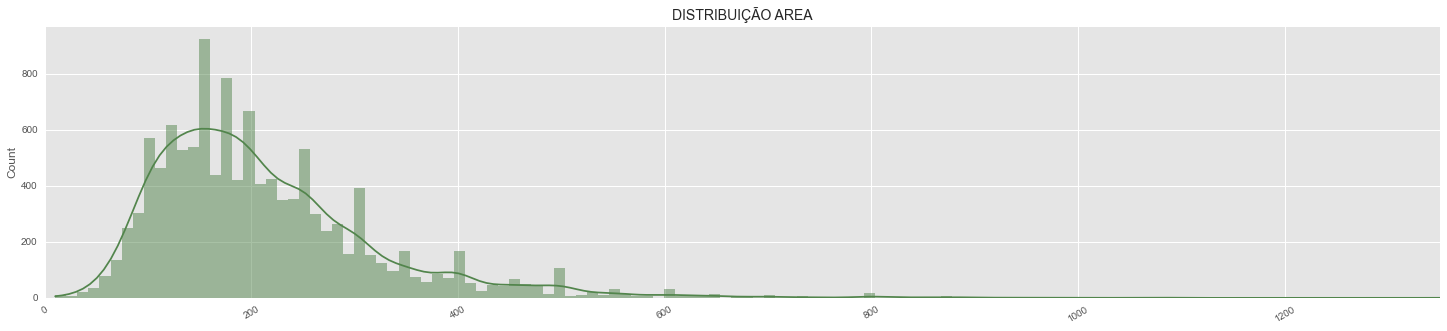

In [431]:
f, (ax) = plt.subplots(1, figsize=(25, 5))
plot_valor = df['area'].values
sns.histplot (plot_valor, color='#52854C', kde=True, linewidth=0)
ax.set_title('DISTRIBUIÇÃO AREA', fontsize=14)
ax.set_xlim(0,np.max(df['area']))
start, end = ax.get_xlim()
plt.xticks(rotation=30);
#ax.xaxis.set_ticks(np.arange(start, end,1000));

In [432]:
# quarto deveria ser um campo númerico, vamos verificar o que tem nesse campo
print('quarto:',str(df['quarto'].drop_duplicates().values).strip(),'\n')

quarto: ['2' '3' '5' '4' '7' '1' '6' '--' '8' '11' '10' '9' '16' '12' '28' '22'] 



In [433]:
# Algumas casas não possuem quarto
df.query("quarto.str.contains('--')")

,data_consulta,titulo,endereco,tipo_imovel,area,quarto,banheiro,vagas_garagem,valor,anunciante,link,bairro,cidade,endereco2,qualidade_localizacao,rua,numero
417,2022-08-17,"Casa à Venda, 680m²","Aclimação, São Paulo - SP",Casa,680.0,--,6,10,R$ 4.000.000,Sousa Norte Imoveis Ltda - Epp,/imovel/casa-aclimacao-centro-sao-paulo-com-ga...,Aclimação,SÃO PAULO,Aclimação- São Paulo - SP,Sem informação de rua e número,NaN,NaN
1024,2022-08-17,"Casa à Venda, 447m²","Estrada das Lágrimas - Jardim São Caetano, São...",Casa,447.0,--,1,5,R$ 1.590.000,Goncalves Imoveis E Condominios Ltda,/imovel/casa-jardim-sao-caetano-bairros-sao-ca...,Jardim São Caetano,SÃO CAETANO DO SUL,Estrada das Lágrimas - Jardim São Caetano- São...,Sem informação de número,Estrada das Lágrimas,NaN
1089,2022-08-17,"Casa à Venda, 147m²","Rua Pelegrino Bernardo - Olímpico, São Caetano...",Casa,147.0,--,1,5,R$ 1.200.000,Goncalves Imoveis E Condominios Ltda,/imovel/casa-olimpico-bairros-sao-caetano-do-s...,Olímpico,SÃO CAETANO DO SUL,Rua Pelegrino Bernardo - Olímpico- São Caetano...,Sem informação de número,Rua Pelegrino Bernardo,NaN
1178,2022-08-17,"Casa à Venda, 150m²","Fundaçao, São Caetano do Sul - SP",Casa,150.0,--,4,3,R$ 610.000,Ideal Assessoria Imobiliária,/imovel/casa-fundacao-bairros-sao-caetano-do-s...,Fundaçao,SÃO CAETANO DO SUL,Fundaçao- São Caetano do Sul - SP,Sem informação de rua e número,NaN,NaN
1241,2022-08-17,"Casa à Venda, 170m²","Avenida Goiás, 3235 - Barcelona, São Caetano d...",Casa,170.0,--,2,2,R$ 750.000,Phd Imoveis Intermediacao De Bens Ltda -Me,/imovel/casa-barcelona-bairros-sao-caetano-do-...,Barcelona,SÃO CAETANO DO SUL,Avenida Goiás- 3235 - Barcelona- São Caetano d...,Informação completa,Avenida Goiás,3235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7801,2022-08-17,"Casa à Venda, 313m²","Vila Mariana, São Paulo - SP",Casa,313.0,--,4,2,R$ 4.000.000,Sp House Imobiliária E Administradora - Ltda,/imovel/casa-vila-mariana-zona-sul-sao-paulo-c...,Vila Mariana,SÃO PAULO,Vila Mariana- São Paulo - SP,Sem informação de rua e número,NaN,NaN
8043,2022-08-17,"Casa à Venda, 150m²","Vila Mariana, São Paulo - SP",Casa,150.0,--,1,2,R$ 800.000,Directa Loja De Imoveis Ltda Epp,/imovel/casa-vila-mariana-zona-sul-sao-paulo-c...,Vila Mariana,SÃO PAULO,Vila Mariana- São Paulo - SP,Sem informação de rua e número,NaN,NaN
8127,2022-08-17,"Casa à Venda, 311m²","Rua Ouvidor Peleja - Vila Mariana, São Paulo - SP",Casa,311.0,--,4,8,R$ 1.600.000,Conquista Imóveis Ltda,/imovel/casa-vila-mariana-zona-sul-sao-paulo-c...,Vila Mariana,SÃO PAULO,Rua Ouvidor Peleja - Vila Mariana- São Paulo - SP,Sem informação de número,Rua Ouvidor Peleja,NaN
11328,2022-08-16,"Casa à Venda, 130m²","Ipiranga, São Paulo - SP",Casa,130.0,--,1,--,R$ 490.000,Directa Loja De Imoveis Ltda Epp,/imovel/casa-ipiranga-zona-sul-sao-paulo-130m2...,Ipiranga,SÃO PAULO,Ipiranga- São Paulo - SP,Sem informação de rua e número,NaN,NaN


In [434]:
df.loc[df['quarto'] == '--', 'quarto'] = '0'

In [435]:
df['quarto'] = df['quarto'].astype(float)

In [436]:
df['quarto'].sort_values(ascending=True)

4389     0.0
4456     0.0
7493     0.0
4458     0.0
8043     0.0
        ... 
8361    28.0
7383    28.0
8077    28.0
8691    28.0
7944    28.0
Name: quarto, Length: 11892, dtype: float64

In [437]:
# quarto deveria ser um campo númerico, vamos verificar o que tem nesse campo
print('banheiro:',str(df['banheiro'].drop_duplicates().values).strip(),'\n')

banheiro: ['2' '1' '5' '6' '9' '4' '3' '8' '7' '15' '13' '10' '12' '16' '11' '28'
 '21' '20'] 



In [438]:
df['banheiro'] = df['banheiro'].astype(float)

In [439]:
# quarto deveria ser um campo númerico, vamos verificar o que tem nesse campo
print('vagas_garagem:',str(df['vagas_garagem'].drop_duplicates().values).strip(),'\n')

vagas_garagem: ['--' '3' '10' '2' '5' '4' '8' '1' '7' '6' '9' '12' '15' '16' '11' '14'
 '20' '13' '18' '30' '28'] 



In [440]:
df.loc[df['vagas_garagem'] == '--', 'vagas_garagem'] = '0'

In [441]:
df['vagas_garagem'] = df['vagas_garagem'].astype(float)

In [442]:
# área deveria ser um campo númerico, vamos verificar o que tem nesse campo
print('valor:',str(df['valor'].drop_duplicates().values).strip(),'\n')

valor: ['R$ 678.000' 'R$ 851.000' 'R$ 680.000' ... 'R$ 4.800.000' 'R$ 1.007.000'
 'R$ 3.240.000'] 



In [443]:
df['valor'].value_counts()

R$ 1.200.000                            401
R$ 1.100.000                            265
R$ 850.000                              256
R$ 750.000                              217
R$ 1.300.000                            215
                                       ... 
R$ 5.000 /Mês    R$ 1.250.000             1
R$ 535.000   Preço abaixo do mercado      1
R$ 765.000   Preço abaixo do mercado      1
R$ 2.900 /Mês    R$ 870.000               1
R$ 3.240.000                              1
Name: valor, Length: 1861, dtype: int64

In [444]:
# Adicionar uma barra antes do valor do imovel para facilitar na divisão dos campos de aluguél e valor

df.loc[df['valor'].str.count('/') == 0, 'valor'] = '/' + df['valor'].astype(str)

In [445]:
# separar os campos

novo_val = df['valor'].str.split("/", n = 2,  expand = True)

In [446]:

# renomear as colunas e exibir a tabela

colunas = ['aluguel','valor_imovel']
novo_val.columns = colunas
novo_val.head(15)

,aluguel,valor_imovel
0,,R$ 678.000
1,,R$ 851.000
2,,R$ 680.000
3,,R$ 2.180.000
4,,R$ 636.000
5,,R$ 790.000 Preço abaixo do mercado
6,,R$ 3.290.000
7,,R$ 850.000
8,,R$ 3.390.000
9,,R$ 1.200.000 Preço abaixo do mercado


In [447]:
# formatar os dados de valor

def transform_str(value:str):
    return value.replace(',','').replace('R$','').replace('.',',').replace('Mês',',').replace('\n',',').replace(' ',',').replace('Preçoabaixodomercado','')

for col in novo_val.columns:
    novo_val['valor_imovel']=[transform_str(k) for k in novo_val['valor_imovel']]
    novo_val['aluguel']=[transform_str(k) for k in novo_val['aluguel']]

In [448]:
# exibir os dados

novo_val

,aluguel,valor_imovel
0,,678000
1,,851000
2,,680000
3,,2180000
4,,636000
...,...,...
11891,,1950000
11892,,420000
11893,,700000
11894,,790000


In [449]:
# exibir todos os valores

print('valor_imovel:',str(novo_val['valor_imovel'].drop_duplicates().values).strip(),'\n')

valor_imovel: ['678000' '851000' '680000' ... '4800000' '1007000' '3240000'] 



In [450]:
# apagar a coluna de valor do imóvel do dataset original e juntar ao novo dataset que contem os valores limpos

del df['valor']
df['valor_imovel'] = novo_val['valor_imovel']

In [451]:
df['valor_imovel'] = df['valor_imovel'].astype(float)

In [452]:
df.describe()

,area,quarto,banheiro,vagas_garagem,valor_imovel
count,11892.000000,11892.000000,11892.000000,11892.000000,1.189200e+04
mean,213.546754,3.017070,2.784897,2.836445,1.274955e+06
std,113.394329,1.369365,1.680966,2.111294,9.290832e+05
min,10.000000,0.000000,1.000000,0.000000,2.136600e+04
25%,137.000000,2.000000,2.000000,2.000000,7.300000e+05
50%,189.000000,3.000000,2.000000,2.000000,1.015500e+06
75%,260.000000,3.000000,4.000000,4.000000,1.500000e+06
max,1350.000000,28.000000,28.000000,30.000000,2.000000e+07


In [454]:
df

,data_consulta,titulo,endereco,tipo_imovel,area,quarto,banheiro,vagas_garagem,anunciante,link,bairro,cidade,endereco2,qualidade_localizacao,rua,numero,valor_imovel
0,2022-08-17,"Casa com 2 Quartos à Venda, 110m²","Rua Heitor Peixoto, 17 - Aclimação, São Paulo ...",Casa,110.0,2.0,2.0,0.0,Dream Home Broker,/imovel/casa-2-quartos-aclimacao-centro-sao-pa...,Aclimação,SÃO PAULO,Rua Heitor Peixoto- 17 - Aclimação- São Paulo ...,Informação completa,Rua Heitor Peixoto,17,678000.0
1,2022-08-17,"Casa com 3 Quartos à Venda, 200m²","Rua Nilo, 171 - Aclimação, São Paulo - SP",Casa,200.0,3.0,2.0,0.0,Pb Imóveis,/imovel/casa-3-quartos-aclimacao-centro-sao-pa...,Aclimação,SÃO PAULO,Rua Nilo- 171 - Aclimação- São Paulo - SP,Informação completa,Rua Nilo,171,851000.0
2,2022-08-17,"Casa com 3 Quartos à Venda, 110m²","Rua Pais de Andrade - Aclimação, São Paulo - SP",Casa,110.0,3.0,1.0,0.0,Century 21 Ello,/imovel/casa-3-quartos-aclimacao-centro-sao-pa...,Aclimação,SÃO PAULO,Rua Pais de Andrade - Aclimação- São Paulo - SP,Sem informação de número,Rua Pais de Andrade,NaN,680000.0
3,2022-08-17,"Casa com 5 Quartos à Venda, 225m²","Rua Ximbó - Aclimação, São Paulo - SP",Casa,225.0,5.0,5.0,3.0,Bastos Imoveis Ltda Me,/imovel/casa-5-quartos-aclimacao-centro-sao-pa...,Aclimação,SÃO PAULO,Rua Ximbó - Aclimação- São Paulo - SP,Sem informação de número,Rua Ximbó,NaN,2180000.0
4,2022-08-17,"Casa com 2 Quartos à Venda, 199m²","Rua Mazzini - Aclimação, São Paulo - SP",Casa,199.0,2.0,1.0,0.0,Grupo 360M2,/imovel/casa-2-quartos-aclimacao-centro-sao-pa...,Aclimação,SÃO PAULO,Rua Mazzini - Aclimação- São Paulo - SP,Sem informação de número,Rua Mazzini,NaN,636000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11891,2022-08-16,"Casa com 6 Quartos à Venda, 354m²","Rua Gonçalo Pedrosa - Ipiranga, São Paulo - SP",Casa,354.0,6.0,6.0,3.0,Quinto Andar Vendas,/imovel/casa-6-quartos-ipiranga-zona-sul-sao-p...,Ipiranga,SÃO PAULO,Rua Gonçalo Pedrosa - Ipiranga- São Paulo - SP,Sem informação de número,Rua Gonçalo Pedrosa,NaN,1950000.0
11892,2022-08-16,"Casa com 2 Quartos à Venda, 120m²","Rua Mil Oitocentos e Vinte e Dois - Ipiranga, ...",Casa,120.0,2.0,1.0,1.0,Arbo,/imovel/casa-2-quartos-ipiranga-zona-sul-sao-p...,Ipiranga,SÃO PAULO,Rua Mil Oitocentos e Vinte e Dois - Ipiranga- ...,Sem informação de número,Rua Mil Oitocentos e Vinte e Dois,NaN,420000.0
11893,2022-08-16,"Casa com 3 Quartos à Venda, 226m²","Rua Leais Paulistanos - Ipiranga, São Paulo - SP",Casa,226.0,3.0,3.0,1.0,Quinto Andar Vendas,/imovel/casa-3-quartos-ipiranga-zona-sul-sao-p...,Ipiranga,SÃO PAULO,Rua Leais Paulistanos - Ipiranga- São Paulo - SP,Sem informação de número,Rua Leais Paulistanos,NaN,700000.0
11894,2022-08-16,"Casa com 4 Quartos à Venda, 297m²","Rua Vergueiro - Ipiranga, São Paulo - SP",Casa,297.0,4.0,3.0,1.0,Quinto Andar Vendas,/imovel/casa-4-quartos-ipiranga-zona-sul-sao-p...,Ipiranga,SÃO PAULO,Rua Vergueiro - Ipiranga- São Paulo - SP,Sem informação de número,Rua Vergueiro,NaN,790000.0


In [455]:
df['valor_m2'] = df['valor_imovel']/df['area']

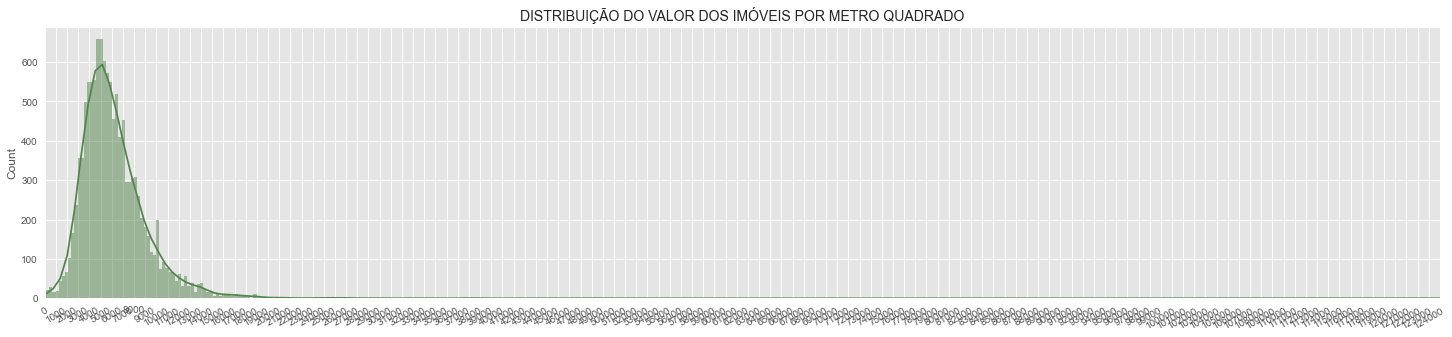

In [456]:
f, (ax) = plt.subplots(1, figsize=(25, 5))
plot_valor = df['valor_m2'].values
sns.histplot (plot_valor, color='#52854C', kde=True, linewidth=0)
ax.set_title('DISTRIBUIÇÃO DO VALOR DOS IMÓVEIS POR METRO QUADRADO', fontsize=14)
ax.set_xlim(0,np.max(df['valor_m2']))
start, end = ax.get_xlim()
plt.xticks(rotation=30)
ax.xaxis.set_ticks(np.arange(start, end,1000));

In [457]:
df['zscore_val_m2'] = zscore(df['valor_m2'])
outliers = df.loc[df['zscore_val_m2'].abs() > 3]
outliers.sort_values('zscore_val_m2', ascending = False).reset_index()

,index,data_consulta,titulo,endereco,tipo_imovel,area,quarto,banheiro,vagas_garagem,anunciante,link,bairro,cidade,endereco2,qualidade_localizacao,rua,numero,valor_imovel,valor_m2,zscore_val_m2
0,6589,2022-08-17,"Casa com 2 Quartos à Venda, 10m²","Alameda dos Guatás, 1704 - Saúde, São Paulo - SP",Casa,10.0,2.0,2.0,1.0,Arbo Imóveis,/imovel/casa-2-quartos-saude-zona-sul-sao-paul...,Saúde,SÃO PAULO,Alameda dos Guatás- 1704 - Saúde- São Paulo - SP,Informação completa,Alameda dos Guatás,1704,1250000.0,125000.000000,30.013301
1,11494,2022-08-16,"Casa com Quarto à Venda, 30m²","Rua Bom Pastor - Ipiranga, São Paulo - SP",Casa,30.0,1.0,1.0,0.0,Quinto Andar Vendas,/imovel/casa-1-quartos-ipiranga-zona-sul-sao-p...,Ipiranga,SÃO PAULO,Rua Bom Pastor - Ipiranga- São Paulo - SP,Sem informação de número,Rua Bom Pastor,NaN,3650000.0,121666.666667,29.170402
2,1446,2022-08-17,"Casa com 3 Quartos à Venda, 10m²","Rua Antônio Martorelli - Osvaldo Cruz, São Cae...",Casa,10.0,3.0,2.0,5.0,Metropolis Brokers,/imovel/casa-3-quartos-osvaldo-cruz-bairros-sa...,Osvaldo Cruz,SÃO CAETANO DO SUL,Rua Antônio Martorelli - Osvaldo Cruz- São Cae...,Sem informação de número,Rua Antônio Martorelli,NaN,1200000.0,120000.000000,28.748953
3,8849,2022-08-17,"Casa com 3 Quartos à Venda, 10m²","Rua França Pinto - Vila Mariana, São Paulo - SP",Casa,10.0,3.0,2.0,1.0,Arbo Imóveis,/imovel/casa-3-quartos-vila-mariana-zona-sul-s...,Vila Mariana,SÃO PAULO,Rua França Pinto - Vila Mariana- São Paulo - SP,Sem informação de número,Rua França Pinto,NaN,1100000.0,110000.000000,26.220256
4,1997,2022-08-17,"Casa com Quarto à Venda, 11m²","Osvaldo Cruz, São Caetano do Sul - SP",Casa,11.0,1.0,1.0,3.0,Rio Imóveis Sp - Ltda,/imovel/casa-1-quartos-osvaldo-cruz-bairros-sa...,Osvaldo Cruz,SÃO CAETANO DO SUL,Osvaldo Cruz- São Caetano do Sul - SP,Sem informação de rua e número,NaN,NaN,960000.0,87272.727273,20.473218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,10767,2022-08-16,"Casa com 2 Quartos à Venda, 55m²","Ponte Almirante Lobo - Ipiranga, São Paulo - SP",Casa,55.0,2.0,1.0,0.0,Portal Ipiranga Assessoria Imobiliária,/imovel/casa-2-quartos-ipiranga-zona-sul-sao-p...,Ipiranga,SÃO PAULO,Ponte Almirante Lobo - Ipiranga- São Paulo - SP,Sem informação de número,Ponte Almirante Lobo,NaN,1018000.0,18509.090909,3.084980
74,8250,2022-08-17,"Casa com 3 Quartos à Venda, 195m²",Rua Professora Carolina Ribeiro - Vila Mariana...,Casa,195.0,3.0,5.0,5.0,Lopes Maber,/imovel/casa-3-quartos-vila-mariana-zona-sul-s...,Vila Mariana,SÃO PAULO,Rua Professora Carolina Ribeiro - Vila Mariana...,Sem informação de número,Rua Professora Carolina Ribeiro,NaN,3600000.0,18461.538462,3.072955
75,10748,2022-08-16,"Casa com 4 Quartos à Venda, 120m²","Ipiranga, São Paulo - SP",Casa,120.0,4.0,4.0,3.0,Mega Brasil Imóveis,/imovel/casa-4-quartos-ipiranga-zona-sul-sao-p...,Ipiranga,SÃO PAULO,Ipiranga- São Paulo - SP,Sem informação de rua e número,NaN,NaN,2200000.0,18333.333333,3.040536
76,7087,2022-08-17,"Casa com 3 Quartos à Venda, 300m²","Vila Mariana, São Paulo - SP",Casa,300.0,3.0,5.0,5.0,Coelho Da Fonseca,/imovel/casa-3-quartos-vila-mariana-zona-sul-s...,Vila Mariana,SÃO PAULO,Vila Mariana- São Paulo - SP,Sem informação de rua e número,NaN,NaN,5500000.0,18333.333333,3.040536


In [458]:
# filtro no z-score de até dois desvios padrão para evitar trazer anúncios duvidósos
df_limpo = df.loc[df['zscore_val_m2'].abs() <= 3]

In [459]:
df_limpo

,data_consulta,titulo,endereco,tipo_imovel,area,quarto,banheiro,vagas_garagem,anunciante,link,bairro,cidade,endereco2,qualidade_localizacao,rua,numero,valor_imovel,valor_m2,zscore_val_m2
0,2022-08-17,"Casa com 2 Quartos à Venda, 110m²","Rua Heitor Peixoto, 17 - Aclimação, São Paulo ...",Casa,110.0,2.0,2.0,0.0,Dream Home Broker,/imovel/casa-2-quartos-aclimacao-centro-sao-pa...,Aclimação,SÃO PAULO,Rua Heitor Peixoto- 17 - Aclimação- São Paulo ...,Informação completa,Rua Heitor Peixoto,17,678000.0,6163.636364,-0.036811
1,2022-08-17,"Casa com 3 Quartos à Venda, 200m²","Rua Nilo, 171 - Aclimação, São Paulo - SP",Casa,200.0,3.0,2.0,0.0,Pb Imóveis,/imovel/casa-3-quartos-aclimacao-centro-sao-pa...,Aclimação,SÃO PAULO,Rua Nilo- 171 - Aclimação- São Paulo - SP,Informação completa,Rua Nilo,171,851000.0,4255.000000,-0.519448
2,2022-08-17,"Casa com 3 Quartos à Venda, 110m²","Rua Pais de Andrade - Aclimação, São Paulo - SP",Casa,110.0,3.0,1.0,0.0,Century 21 Ello,/imovel/casa-3-quartos-aclimacao-centro-sao-pa...,Aclimação,SÃO PAULO,Rua Pais de Andrade - Aclimação- São Paulo - SP,Sem informação de número,Rua Pais de Andrade,NaN,680000.0,6181.818182,-0.032214
3,2022-08-17,"Casa com 5 Quartos à Venda, 225m²","Rua Ximbó - Aclimação, São Paulo - SP",Casa,225.0,5.0,5.0,3.0,Bastos Imoveis Ltda Me,/imovel/casa-5-quartos-aclimacao-centro-sao-pa...,Aclimação,SÃO PAULO,Rua Ximbó - Aclimação- São Paulo - SP,Sem informação de número,Rua Ximbó,NaN,2180000.0,9688.888889,0.854618
4,2022-08-17,"Casa com 2 Quartos à Venda, 199m²","Rua Mazzini - Aclimação, São Paulo - SP",Casa,199.0,2.0,1.0,0.0,Grupo 360M2,/imovel/casa-2-quartos-aclimacao-centro-sao-pa...,Aclimação,SÃO PAULO,Rua Mazzini - Aclimação- São Paulo - SP,Sem informação de número,Rua Mazzini,NaN,636000.0,3195.979899,-0.787242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11891,2022-08-16,"Casa com 6 Quartos à Venda, 354m²","Rua Gonçalo Pedrosa - Ipiranga, São Paulo - SP",Casa,354.0,6.0,6.0,3.0,Quinto Andar Vendas,/imovel/casa-6-quartos-ipiranga-zona-sul-sao-p...,Ipiranga,SÃO PAULO,Rua Gonçalo Pedrosa - Ipiranga- São Paulo - SP,Sem informação de número,Rua Gonçalo Pedrosa,NaN,1950000.0,5508.474576,-0.202482
11892,2022-08-16,"Casa com 2 Quartos à Venda, 120m²","Rua Mil Oitocentos e Vinte e Dois - Ipiranga, ...",Casa,120.0,2.0,1.0,1.0,Arbo,/imovel/casa-2-quartos-ipiranga-zona-sul-sao-p...,Ipiranga,SÃO PAULO,Rua Mil Oitocentos e Vinte e Dois - Ipiranga- ...,Sem informação de número,Rua Mil Oitocentos e Vinte e Dois,NaN,420000.0,3500.000000,-0.710364
11893,2022-08-16,"Casa com 3 Quartos à Venda, 226m²","Rua Leais Paulistanos - Ipiranga, São Paulo - SP",Casa,226.0,3.0,3.0,1.0,Quinto Andar Vendas,/imovel/casa-3-quartos-ipiranga-zona-sul-sao-p...,Ipiranga,SÃO PAULO,Rua Leais Paulistanos - Ipiranga- São Paulo - SP,Sem informação de número,Rua Leais Paulistanos,NaN,700000.0,3097.345133,-0.812184
11894,2022-08-16,"Casa com 4 Quartos à Venda, 297m²","Rua Vergueiro - Ipiranga, São Paulo - SP",Casa,297.0,4.0,3.0,1.0,Quinto Andar Vendas,/imovel/casa-4-quartos-ipiranga-zona-sul-sao-p...,Ipiranga,SÃO PAULO,Rua Vergueiro - Ipiranga- São Paulo - SP,Sem informação de número,Rua Vergueiro,NaN,790000.0,2659.932660,-0.922792


In [460]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11814 entries, 0 to 11895
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   data_consulta          11814 non-null  object 
 1   titulo                 11814 non-null  object 
 2   endereco               11814 non-null  object 
 3   tipo_imovel            11814 non-null  object 
 4   area                   11814 non-null  float64
 5   quarto                 11814 non-null  float64
 6   banheiro               11814 non-null  float64
 7   vagas_garagem          11814 non-null  float64
 8   anunciante             11814 non-null  object 
 9   link                   11814 non-null  object 
 10  bairro                 11814 non-null  object 
 11  cidade                 11814 non-null  object 
 12  endereco2              11814 non-null  object 
 13  qualidade_localizacao  11814 non-null  object 
 14  rua                    8277 non-null   object 
 15  nu

In [461]:
df_limpo.to_sql('house_prices_cleaned_20221220', index=False, if_exists='replace',con=conn)

11814